## Pandas: access to the remote json from MongoDB
- The json file is generated on the fly from the express server of Node.js.
- The data stored in MongoDB are saved in the json file.
- The IMU data are composed of nine time series; acceleration, gyroscope, and magnetic field.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import animation, rc

## [실시간 데이터 로드]
- loading real-time json file from MongoDB via web

- http://life21c.inje.ac.kr:3030/client_33imu_gauge.html

In [38]:
# loading real-time json file from MongoDB via web (CORS, port=3030)
url="http://life21c.inje.ac.kr:3030/iot"
df=pd.read_json(url)
print('Large IoT data was retrieved successfully from MongoDB!')

Large IoT data was retrieved successfully from MongoDB!


In [39]:
df.head()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
0,639a7a5d2f1ab8f42ac826c8,2022-12-15 10:37:33.724,0.03,-0.01,0.99,-0.18,-3.54,-0.31,-12.12,16.19,-42.16,0
1,639a7a5e2f1ab8f42ac826ca,2022-12-15 10:37:34.233,0.03,-0.01,0.99,-0.24,-3.60,-0.24,-11.82,16.52,-41.88,0
2,639a7a5e2f1ab8f42ac826cc,2022-12-15 10:37:34.742,0.03,-0.01,0.99,-0.06,-3.54,-0.24,-12.05,16.16,-41.75,0
3,639a7a5f2f1ab8f42ac826ce,2022-12-15 10:37:35.251,0.03,-0.01,0.99,-0.24,-3.48,-0.31,-12.06,16.21,-41.61,0
4,639a7a5f2f1ab8f42ac826d0,2022-12-15 10:37:35.760,0.03,-0.01,0.99,-0.24,-3.54,-0.31,-12.00,16.31,-42.70,0


In [40]:
df.tail()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
30778,639ab7c62eb916f872310882,2022-12-15 14:59:34.306,0.03,-0.00,0.99,-0.37,-3.78,-0.31,-11.89,-2.40,-55.18,0
30779,639ab7c62eb916f872310884,2022-12-15 14:59:34.815,0.03,-0.01,0.99,-0.18,-3.54,-0.18,-11.55,-2.06,-55.37,0
30780,639ab7c72eb916f872310886,2022-12-15 14:59:35.324,0.04,-0.00,0.99,-0.31,-3.54,-0.31,-11.36,-2.40,-56.25,0
30781,639ab7c72eb916f872310888,2022-12-15 14:59:35.833,0.03,-0.00,0.99,-0.31,-3.60,-0.12,-12.26,-1.98,-55.76,0
30782,639ab7c82eb916f87231088a,2022-12-15 14:59:36.342,0.04,-0.00,0.99,-0.18,-3.72,-0.24,-11.56,-2.16,-55.80,0


In [41]:
df.shape, type(df)

((30783, 12), pandas.core.frame.DataFrame)

In [42]:
df['date'][:1],df['date'][-1:]

(0   2022-12-15 10:37:33.724
 Name: date, dtype: datetime64[ns], 30782   2022-12-15 14:59:36.342
 Name: date, dtype: datetime64[ns])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30783 entries, 0 to 30782
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   _id      30783 non-null  object        
 1   date     30783 non-null  datetime64[ns]
 2   accel_x  30783 non-null  float64       
 3   accel_y  30783 non-null  float64       
 4   accel_z  30783 non-null  float64       
 5   gyro_x   30783 non-null  float64       
 6   gyro_y   30783 non-null  float64       
 7   gyro_z   30783 non-null  float64       
 8   mag_x    30783 non-null  float64       
 9   mag_y    30783 non-null  float64       
 10  mag_z    30783 non-null  float64       
 11  __v      30783 non-null  int64         
dtypes: datetime64[ns](1), float64(9), int64(1), object(1)
memory usage: 2.8+ MB


In [44]:
df.describe()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
count,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.000000,30783.0
mean,-0.007939,-0.003533,0.939176,-0.021744,-3.216461,-0.305658,-3.551751,2.218689,-50.802745,0.0
std,0.228842,0.155314,0.236230,45.013228,37.136737,29.170656,11.783970,11.376604,15.852841,0.0
min,-2.900000,-2.250000,-1.600000,-909.550000,-613.160000,-480.350000,-47.270000,-26.550000,-103.260000,0.0
25%,0.010000,-0.010000,0.990000,-0.310000,-3.600000,-0.370000,-11.520000,-5.770000,-55.320000,0.0
50%,0.030000,0.000000,0.990000,-0.240000,-3.540000,-0.310000,-7.630000,-1.890000,-53.880000,0.0
75%,0.030000,-0.000000,0.990000,-0.180000,-3.420000,-0.240000,1.390000,7.480000,-46.140000,0.0
max,1.400000,1.680000,2.510000,1258.610000,663.150000,421.870000,35.130000,45.080000,38.240000,0.0


## Check data
- NaN
- missing value

In [70]:
df.isnull().sum()  #/df.shape[0]*100

_id        0
date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
__v        0
dtype: int64

In [71]:
df.isna().sum()

_id        0
date       0
accel_x    0
accel_y    0
accel_z    0
gyro_x     0
gyro_y     0
gyro_z     0
mag_x      0
mag_y      0
mag_z      0
__v        0
dtype: int64

## Replace NaN with mean: Imputation
- NaN ==>> mean, 33.3 (100/3)

In [33]:
 #df=df.fillna(33.3)
 #df.isna().sum()

## IoT data were cleaned!

In [47]:
# Save cleaned iot data in csv file.
df.to_csv('iot33imu_data_cleaned_221215_raw.csv')

In [48]:
df.head()

,_id,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z,__v
0,639a7a5d2f1ab8f42ac826c8,2022-12-15 10:37:33.724,0.03,-0.01,0.99,-0.18,-3.54,-0.31,-12.12,16.19,-42.16,0
1,639a7a5e2f1ab8f42ac826ca,2022-12-15 10:37:34.233,0.03,-0.01,0.99,-0.24,-3.60,-0.24,-11.82,16.52,-41.88,0
2,639a7a5e2f1ab8f42ac826cc,2022-12-15 10:37:34.742,0.03,-0.01,0.99,-0.06,-3.54,-0.24,-12.05,16.16,-41.75,0
3,639a7a5f2f1ab8f42ac826ce,2022-12-15 10:37:35.251,0.03,-0.01,0.99,-0.24,-3.48,-0.31,-12.06,16.21,-41.61,0
4,639a7a5f2f1ab8f42ac826d0,2022-12-15 10:37:35.760,0.03,-0.01,0.99,-0.24,-3.54,-0.31,-12.00,16.31,-42.70,0


## New DataFrame : iot_data
### Dataframe with date and ax,ay,az,gx,gy,gz,mx,my,mz

### [DIY-1] 

In [49]:
#  [DIY-1] select columns
cols = ['date',  ]

In [50]:
# Make iot data
iot_data = df[cols]

In [51]:
iot_data.shape

(30783, 1)

In [52]:
iot_data.head()  # date와 9 개의 신호를 확인.

,date
0,2022-12-15 10:37:33.724
1,2022-12-15 10:37:34.233
2,2022-12-15 10:37:34.742
3,2022-12-15 10:37:35.251
4,2022-12-15 10:37:35.760


In [53]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30783 entries, 0 to 30782
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30783 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 240.6 KB


In [54]:
iot_data.isna().sum()

date    0
dtype: int64

In [55]:
# Save iot data in csv file.
iot_data.to_csv('iot_nano33imu_221215.csv')

## EDA (Exploratory Data Analysis, 탐색적 자료 분석) 

In [74]:
# Plot boxplot
iot_data.iloc[:,1:].plot.box(title='Boxplot of all signals')
plt.xticks(rotation=60)
plt.show()

TypeError: ignored

### Plot time series of sensor data

In [57]:
iot_data.plot(x='date', y='accel_x', figsize=(10,5), title='Ax')
plt.xticks(rotation=90)
plt.show()

KeyError: ignored

In [58]:
iot_data.plot(x='date', y='gyro_x', figsize=(10,5), title='Gx')
plt.xticks(rotation=90)
plt.show()

KeyError: ignored

#### 다중그래프 (multiple graphs)

In [59]:
# 3축 가속도를 아래에 그리시오.
iot_data.plot(x='date', y=['accel_x','accel_y','accel_z'], figsize=(10,5), title='Ax, Ay, Az')

KeyError: ignored

### [DIY-2] 

In [60]:
# 3축 자이로 신호를 아래에 그리시오.
iot_data.plot(x='date', y , figsize=(10,5), title='Gx, Gy, Gz')

SyntaxError: ignored

### [DIY-3] 

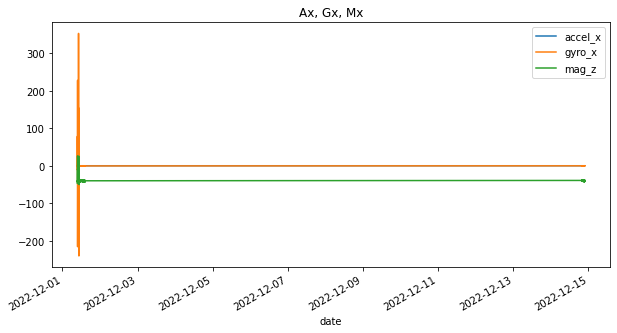

In [ ]:
# Ax, Gx,Mx 신호를 아래에 그리시오.
iot_data.plot(x='date', y , figsize=(10,5), title='Ax, Gx, Mx')

### Plot the mean of sensor data
### [DIY-4] 아래 코드를 참조해서 Az,Gz,Mz의 평균을 구하고 막대 그래프로 그리시오.

In [61]:
iot_data[['temperature','humidity','luminosity']].mean()  

KeyError: ignored

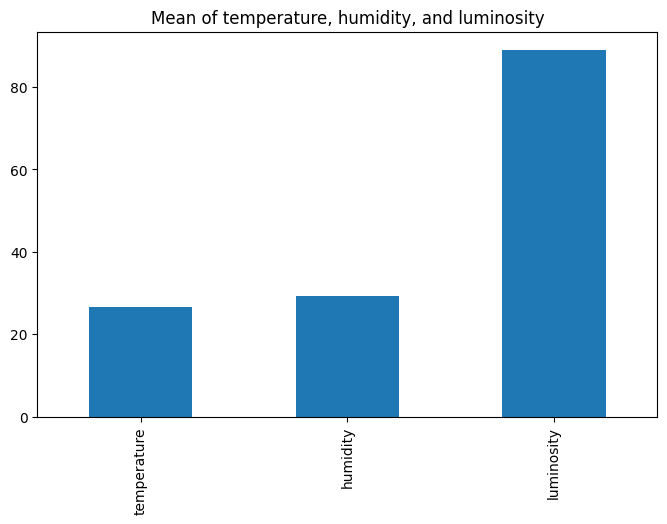

In [ ]:
iot_data[['temperature','humidity','luminosity']].mean().plot.bar(figsize=(8,5), 
                                                                  title="Mean of temperature, humidity, and luminosity")

# Advanced graphics using pandas

### Plot the change of sensor data over various time spans.

> time span: 60 sec, 1 hour, 1 day, $\cdots$

In [ ]:
iot_data.head()

,date,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
0,2022-12-01 09:34:41.583,0.03,-0.01,0.99,-0.37,-3.72,-0.24,-3.47,-10.40,-43.73
1,2022-12-01 09:34:42.092,0.03,-0.01,0.99,-0.43,-3.48,-0.31,-2.89,-12.07,-44.97
2,2022-12-01 09:34:42.600,0.03,-0.01,0.99,-0.31,-3.72,-0.12,-3.36,-12.07,-45.67
3,2022-12-01 09:34:43.109,0.03,-0.01,0.99,-0.37,-3.54,-0.24,-3.52,-11.96,-44.63
4,2022-12-01 09:34:43.618,0.03,-0.01,0.99,-0.24,-3.72,-0.18,-3.27,-12.04,-44.25


#### Set date as index of timestamp

In [ ]:
iot_data.set_index('date',inplace=True)

In [ ]:
iot_data.head()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-01 09:34:41.583,0.03,-0.01,0.99,-0.37,-3.72,-0.24,-3.47,-10.40,-43.73
2022-12-01 09:34:42.092,0.03,-0.01,0.99,-0.43,-3.48,-0.31,-2.89,-12.07,-44.97
2022-12-01 09:34:42.600,0.03,-0.01,0.99,-0.31,-3.72,-0.12,-3.36,-12.07,-45.67
2022-12-01 09:34:43.109,0.03,-0.01,0.99,-0.37,-3.54,-0.24,-3.52,-11.96,-44.63
2022-12-01 09:34:43.618,0.03,-0.01,0.99,-0.24,-3.72,-0.18,-3.27,-12.04,-44.25


In [ ]:
iot_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39565 entries, 2022-12-01 09:34:41.583000 to 2022-12-14 21:47:25.124000
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  39565 non-null  float64
 1   accel_y  39565 non-null  float64
 2   accel_z  39565 non-null  float64
 3   gyro_x   39565 non-null  float64
 4   gyro_y   39565 non-null  float64
 5   gyro_z   39565 non-null  float64
 6   mag_x    39565 non-null  float64
 7   mag_y    39565 non-null  float64
 8   mag_z    39565 non-null  float64
dtypes: float64(9)
memory usage: 3.0 MB


In [ ]:
# Convert date index to Datetime index, 중요!!!
iot_data.index = pd.to_datetime(iot_data.index)

In [ ]:
iot_data.info() # Range index -> timestamp(Datetime) index 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39565 entries, 2022-12-01 09:34:41.583000 to 2022-12-14 21:47:25.124000
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   accel_x  39565 non-null  float64
 1   accel_y  39565 non-null  float64
 2   accel_z  39565 non-null  float64
 3   gyro_x   39565 non-null  float64
 4   gyro_y   39565 non-null  float64
 5   gyro_z   39565 non-null  float64
 6   mag_x    39565 non-null  float64
 7   mag_y    39565 non-null  float64
 8   mag_z    39565 non-null  float64
dtypes: float64(9)
memory usage: 3.0 MB


In [ ]:
# Estimate the mean of the iot data for every minute
iot_data.resample('60S').mean()

,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,mag_x,mag_y,mag_z
date,,,,,,,,,
2022-12-01 09:34:00,0.030000,-0.010000,0.990000,-0.343243,-3.678919,-0.245135,-3.350541,-11.338108,-44.458378
2022-12-01 09:35:00,0.034051,-0.007975,0.991646,0.706962,-3.748734,2.790633,-5.630253,-7.770127,-44.015696
2022-12-01 09:36:00,0.030000,-0.010000,0.989048,-0.351429,-3.969524,-0.306667,-21.542381,14.250000,-40.706667
2022-12-01 09:37:00,0.030000,-0.010000,0.990000,-0.318305,-3.919661,-0.285339,-21.683220,14.094915,-40.948814
2022-12-01 09:38:00,0.030000,-0.010000,0.990000,-0.340000,-3.932288,-0.319746,-21.590763,14.022881,-40.549492
...,...,...,...,...,...,...,...,...,...
2022-12-14 21:43:00,0.030000,-0.010000,0.990000,-0.325593,-3.906186,-0.439068,-19.469153,22.660932,-40.136864
2022-12-14 21:44:00,0.029744,-0.010000,0.990000,-0.319145,-3.933761,-0.448462,-19.264274,22.637265,-39.913675
2022-12-14 21:45:00,0.030254,-0.010000,0.990000,-0.319576,-3.931441,-0.437034,-19.048729,22.602797,-40.102119


In [72]:
#  Plot mean of the all iot data per every minute
iot_data.resample('120S').mean().plot(figsize=(8,5), 
                                     title='Minutely change of Acc, Gyro, Mag')
plt.legend(bbox_to_anchor=(1.02, 1.0))

TypeError: ignored

### [DIY-5]  아래 코드를 참조해서 Ay,Gy,My의 2분 평균값의 변화를 보여 주는 그래프를 그리시오.

In [73]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('120S').mean().plot(figsize=(10,5), 
                                     title='Minutely change of R, G, B',
                                     color="rgb")

KeyError: ignored

### 시간 평균 변화화

In [65]:
# Estimate the mean of iot data for every hour
iot_data.resample('H').mean()  # mean per each hour

TypeError: ignored

In [64]:
iot_data.resample('H').mean().shape, iot_data.resample('H').mean().info()

TypeError: ignored

In [63]:
#  Plot mean of the iot data per every hour 
iot_data.resample('H').mean().plot(figsize=(10,6), '-o'
                                   title='Hourly change of all sensor data') #, 
                                #    ylim=[0,500])

SyntaxError: ignored

### [DIY-6]  아래 코드를 참조해서 Az,Gz,Mz의 1 시간 평균값의 변화를 보여 주는 그래프를 그리시오.

In [62]:
#  Plot mean of the iot data per every minute
iot_data[['r_ratio', 'g_ratio', 'b_ratio']].resample('H').mean().plot(figsize=(10,6), 
                                    color = ['red', 'green', 'blue'],
                                    title='Hourly change of Az, Gz, Mz')

KeyError: ignored

### Good Job!  Have a great winter vacation!!!

----